importing necessary libralies


# Walmart Sales Data Analysis

This notebook analyzes the Walmart sales dataset, covering:
1. Data Import and Cleaning
2. Basic Statistics
3. Group Analysis
4. Pattern Identification

## 1. Setup and Data Import

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better output readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Read and parse the data
csv_path = Path('Walmart.csv')
df = pd.read_csv(csv_path)

# Convert date column with correct format (DD-MM-YYYY)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Display basic information
print("Dataset Overview:")
print("-" * 50)
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

# Check for missing values
missing = df.isnull().sum()
if missing.any():
    print("\nMissing Values:")
    print(missing[missing > 0])
else:
    print("\nNo missing values found in the dataset")

# Display first few rows
print("\nFirst few rows of the dataset:")
display(df.head())

Dataset Overview:
--------------------------------------------------
Shape: 6435 rows, 8 columns

Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Data Types:
Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

No missing values found in the dataset

First few rows of the dataset:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11


## 2. Basic Statistics Analysis
Let's analyze the numerical columns to understand their distributions and relationships.

Basic Statistics for Numerical Columns:
--------------------------------------------------


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31



Skewness (indicates asymmetry):
Store           0.00
Weekly_Sales    0.67
Holiday_Flag    3.37
Temperature    -0.34
Fuel_Price     -0.10
CPI             0.06
Unemployment    1.19
dtype: float64

Kurtosis (indicates heavy tails):
Store          -1.20
Weekly_Sales    0.05
Holiday_Flag    9.38
Temperature    -0.61
Fuel_Price     -1.18
CPI            -1.84
Unemployment    2.64
dtype: float64


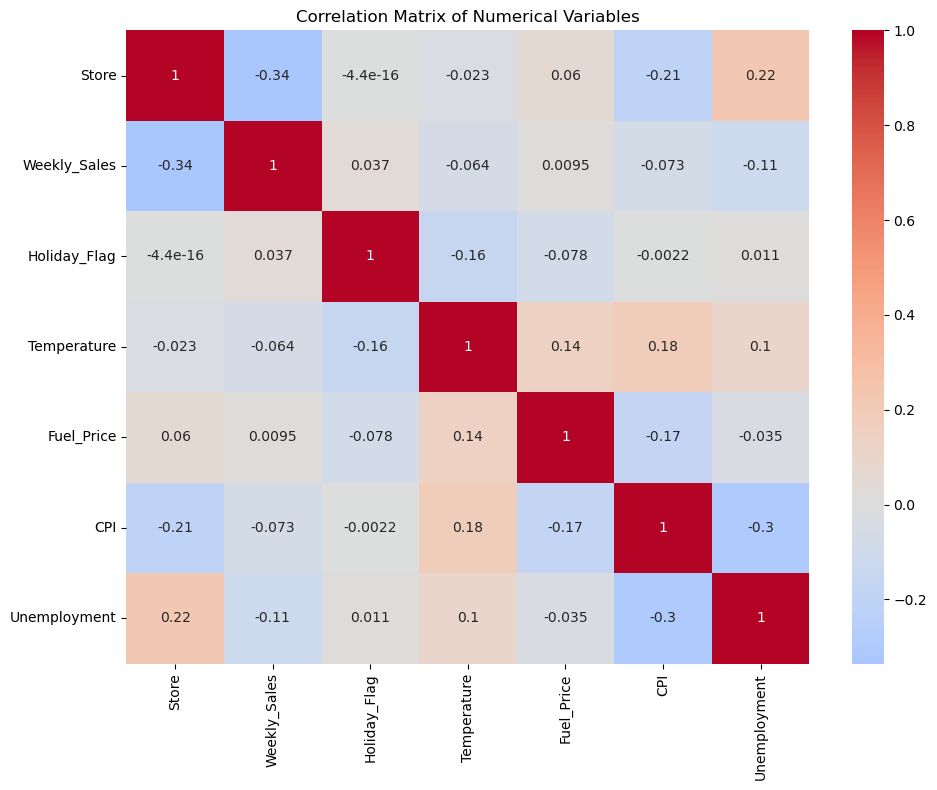


Key Observations:
--------------------------------------------------
Store:
  - Mean: 23.00
  - Std Dev: 12.99
  - CV (Coefficient of Variation): 56.47%
Weekly_Sales:
  - Mean: 1046964.88
  - Std Dev: 564366.62
  - CV (Coefficient of Variation): 53.91%
Holiday_Flag:
  - Mean: 0.07
  - Std Dev: 0.26
  - CV (Coefficient of Variation): 364.72%
Temperature:
  - Mean: 60.66
  - Std Dev: 18.44
  - CV (Coefficient of Variation): 30.41%
Fuel_Price:
  - Mean: 3.36
  - Std Dev: 0.46
  - CV (Coefficient of Variation): 13.67%
CPI:
  - Mean: 171.58
  - Std Dev: 39.36
  - CV (Coefficient of Variation): 22.94%
Unemployment:
  - Mean: 8.00
  - Std Dev: 1.88
  - CV (Coefficient of Variation): 23.45%


In [5]:
# Get numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute basic statistics
print("Basic Statistics for Numerical Columns:")
print("-" * 50)
stats = df[numeric_cols].describe()
display(stats)

# Additional statistics
print("\nSkewness (indicates asymmetry):")
print(df[numeric_cols].skew())

print("\nKurtosis (indicates heavy tails):")
print(df[numeric_cols].kurtosis())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Quick summary of findings
print("\nKey Observations:")
print("-" * 50)
for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    print(f"{col}:")
    print(f"  - Mean: {mean_val:.2f}")
    print(f"  - Std Dev: {std_val:.2f}")
    print(f"  - CV (Coefficient of Variation): {(std_val/mean_val*100):.2f}%")

## 3. Group Analysis
Let's analyze sales patterns by store and holiday flag, and examine temporal trends.

Sales Statistics by Store:
--------------------------------------------------

Top 5 Stores by Average Weekly Sales:


,mean,std,count
Store,,,
20,2107676.87,275900.56,143
4,2094712.96,266201.44,143
14,2020978.40,317569.95,143
13,2003620.31,265507.00,143
2,1925751.34,237683.69,143



Sales Statistics by Holiday Flag:
--------------------------------------------------


,mean,std,count
Holiday_Flag,,,
0,1041256.38,558957.44,5985
1,1122887.89,627684.93,450


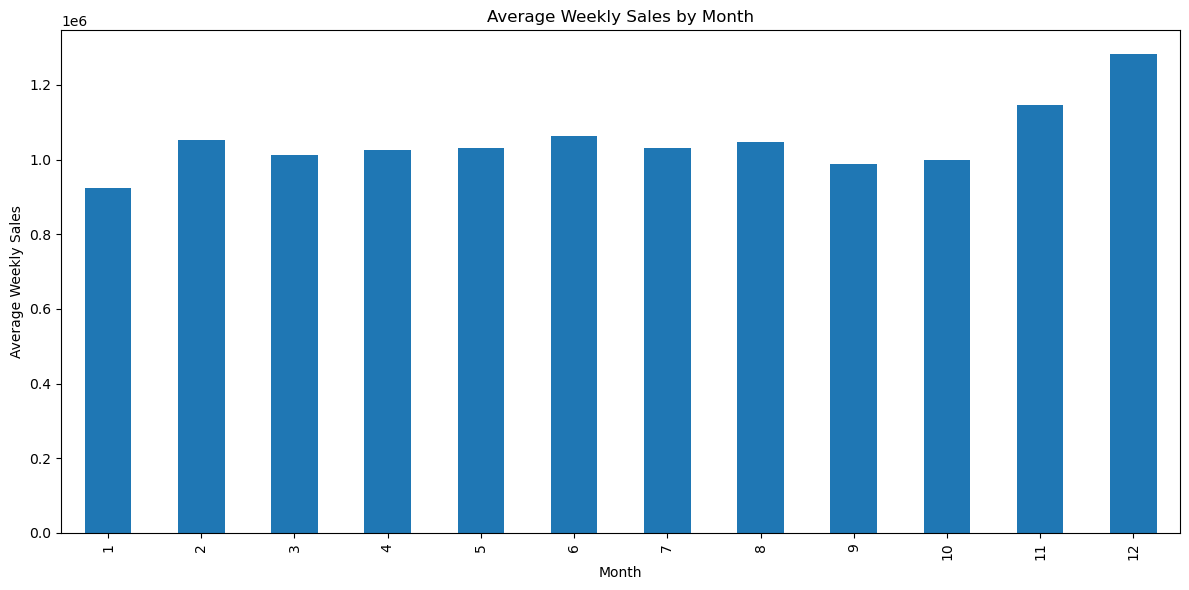

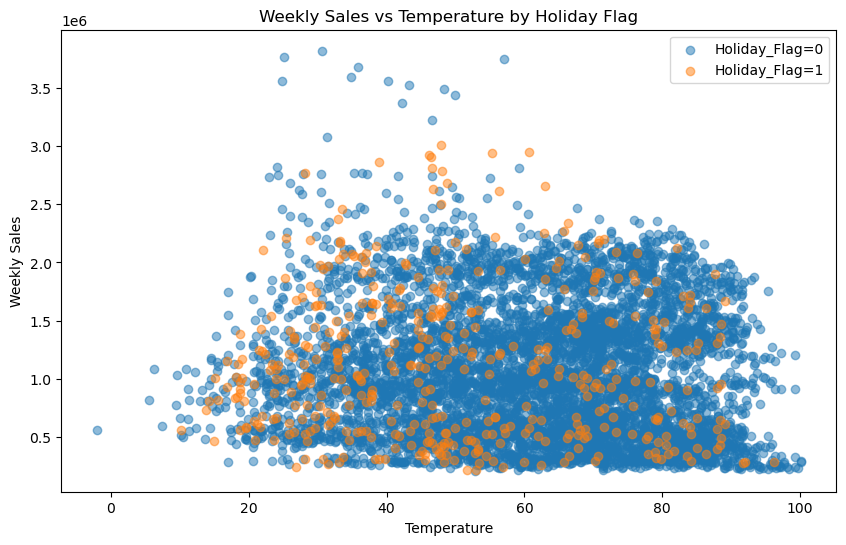


Key Findings:
--------------------------------------------------
1. Store Performance:
   - Top performing store: 20 (avg sales: $2,107,676.87)
   - Store performance variation: 141,585.86 (avg std dev)

2. Holiday Impact:
   - Sales during holidays are 7.8% different from non-holidays

3. Seasonal Patterns:
   - Peak sales month: 12
   - Seasonal variation: 8.5% (CV)


In [6]:
# Store-based analysis
print("Sales Statistics by Store:")
print("-" * 50)
store_stats = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'std', 'count']).round(2)
store_stats = store_stats.sort_values('mean', ascending=False)
print("\nTop 5 Stores by Average Weekly Sales:")
display(store_stats.head())

# Holiday analysis
print("\nSales Statistics by Holiday Flag:")
print("-" * 50)
holiday_stats = df.groupby('Holiday_Flag')['Weekly_Sales'].agg(['mean', 'std', 'count']).round(2)
display(holiday_stats)

# Temporal analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Monthly trends
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

# Sales vs Temperature with Holiday Flag
plt.figure(figsize=(10, 6))
for holiday in [0, 1]:
    mask = df['Holiday_Flag'] == holiday
    plt.scatter(df[mask]['Temperature'], 
               df[mask]['Weekly_Sales'], 
               alpha=0.5,
               label=f'Holiday_Flag={holiday}')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Temperature by Holiday Flag')
plt.legend()
plt.show()

# Print key findings
print("\nKey Findings:")
print("-" * 50)
print(f"1. Store Performance:")
print(f"   - Top performing store: {store_stats.index[0]} (avg sales: ${store_stats.iloc[0]['mean']:,.2f})")
print(f"   - Store performance variation: {store_stats['std'].mean():,.2f} (avg std dev)")

print(f"\n2. Holiday Impact:")
holiday_effect = (holiday_stats.loc[1, 'mean'] - holiday_stats.loc[0, 'mean']) / holiday_stats.loc[0, 'mean'] * 100
print(f"   - Sales during holidays are {holiday_effect:.1f}% different from non-holidays")

print(f"\n3. Seasonal Patterns:")
peak_month = monthly_sales.idxmax()
print(f"   - Peak sales month: {peak_month}")
print(f"   - Seasonal variation: {monthly_sales.std() / monthly_sales.mean() * 100:.1f}% (CV)")

## 4. Pattern Identification and Insights
Let's identify interesting patterns and relationships in the data.

Advanced Pattern Analysis:
--------------------------------------------------


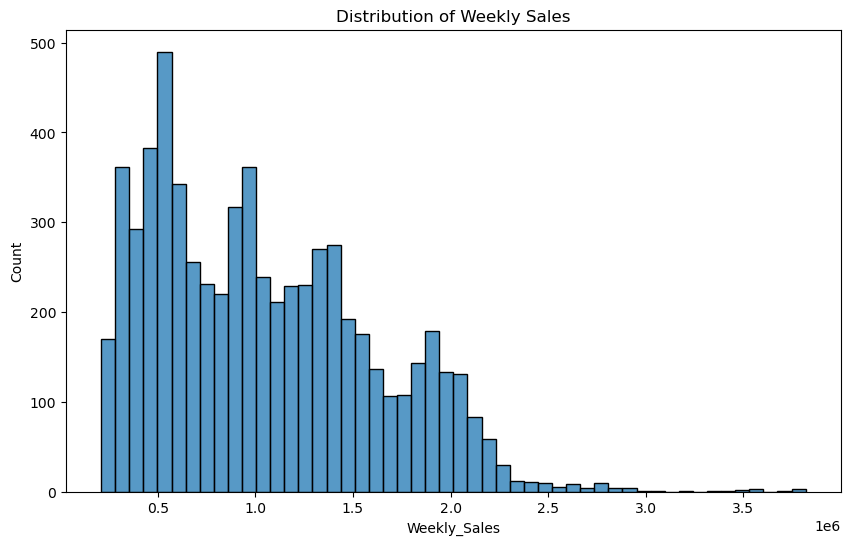


Most Consistent Stores (lowest coefficient of variation):


,mean,std,cv
Store,,,
37,518900.28,21837.46,0.04
30,438579.62,22809.67,0.05
43,633324.72,40598.41,0.06
44,302748.87,24762.83,0.08
31,1395901.44,125855.94,0.09



Stores most affected by temperature (correlation):
Store
44   0.27
26   0.21
16   0.18
27   0.12
24   0.11
dtype: float64


C:\Users\F.G\AppData\Local\Temp\ipykernel_5532\175833638.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_impact = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Temperature']))


<Figure size 1200x600 with 0 Axes>

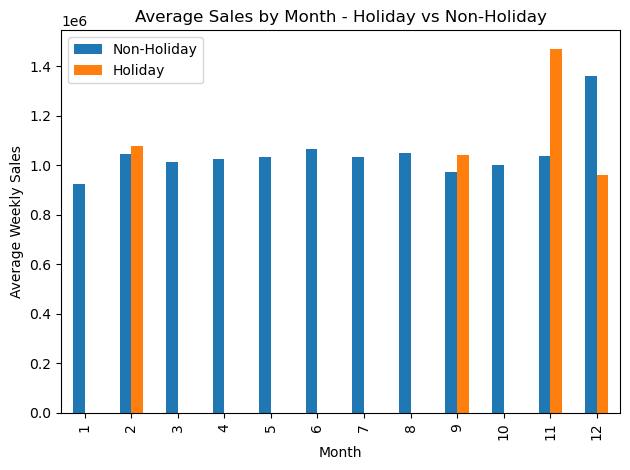


Correlation between economic indicators and sales:
Fuel_Price     -0.01
CPI             0.06
Unemployment   -0.06
dtype: float64

Key Patterns and Insights:
--------------------------------------------------
1. Sales Distribution:
   - Mean weekly sales: $1,046,964.88
   - Sales variability: 53.9% (CV)

2. Store Performance:
   - Most consistent store: 37
   - Least consistent store: 35

3. Temperature Impact:
   - Store most affected by temperature: 44 (correlation: 0.27)
   - Store least affected by temperature: 10 (correlation: -0.43)

4. Economic Indicators:
   - Strongest economic factor: CPI (correlation: 0.06)

5. Year-over-Year Growth:
Year
2010     NaN
2011   -1.27
2012   -1.20
Name: Weekly_Sales, dtype: float64


C:\Users\F.G\AppData\Local\Temp\ipykernel_5532\175833638.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby('Store').apply(


In [7]:
# Advanced pattern analysis
print("Advanced Pattern Analysis:")
print("-" * 50)

# 1. Sales distribution analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weekly_Sales', bins=50)
plt.title('Distribution of Weekly Sales')
plt.show()

# 2. Store performance consistency
store_consistency = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'std'])
store_consistency['cv'] = store_consistency['std'] / store_consistency['mean']
print("\nMost Consistent Stores (lowest coefficient of variation):")
display(store_consistency.sort_values('cv').head())

# 3. Temperature impact by store
temp_impact = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Temperature']))
print("\nStores most affected by temperature (correlation):")
print(temp_impact.sort_values(ascending=False).head())

# 4. Holiday sales patterns
holiday_by_month = df.groupby(['Month', 'Holiday_Flag'])['Weekly_Sales'].mean().unstack()
plt.figure(figsize=(12, 6))
holiday_by_month.plot(kind='bar')
plt.title('Average Sales by Month - Holiday vs Non-Holiday')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.legend(['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()

# 5. Economic indicators impact
print("\nCorrelation between economic indicators and sales:")
economic_vars = ['Fuel_Price', 'CPI', 'Unemployment']
correlations = df.groupby('Store').apply(
    lambda x: pd.Series({
        var: x['Weekly_Sales'].corr(x[var]) 
        for var in economic_vars
    })
).mean()
print(correlations)

# Summary of findings
print("\nKey Patterns and Insights:")
print("-" * 50)
print("1. Sales Distribution:")
print(f"   - Mean weekly sales: ${df['Weekly_Sales'].mean():,.2f}")
print(f"   - Sales variability: {df['Weekly_Sales'].std() / df['Weekly_Sales'].mean() * 100:.1f}% (CV)")

print("\n2. Store Performance:")
print(f"   - Most consistent store: {store_consistency.sort_values('cv').index[0]}")
print(f"   - Least consistent store: {store_consistency.sort_values('cv', ascending=False).index[0]}")

print("\n3. Temperature Impact:")
print(f"   - Store most affected by temperature: {temp_impact.idxmax()} (correlation: {temp_impact.max():.2f})")
print(f"   - Store least affected by temperature: {temp_impact.idxmin()} (correlation: {temp_impact.min():.2f})")

print("\n4. Economic Indicators:")
strongest_economic_factor = economic_vars[abs(correlations).argmax()]
print(f"   - Strongest economic factor: {strongest_economic_factor} (correlation: {correlations[strongest_economic_factor]:.2f})")

# Save year-over-year comparison if multiple years exist
years = df['Year'].unique()
if len(years) > 1:
    yoy_growth = df.groupby('Year')['Weekly_Sales'].mean().pct_change() * 100
    print("\n5. Year-over-Year Growth:")
    print(yoy_growth)